# Dataset 1 
## Fraud Detection in Transactional Data 
## Random Forest Classifier using Scikit learn and XGBoost Libraries

In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Admin\Desktop\Datasets\Fraud Detection in Transactional Data.csv')

# check head of teh datasets
print(df.head())

# Info of the dataset
print(df.info())

# Summary 
print(df.describe())

# Shape
print(df.shape)

   Merchant_id  Transaction date  Average Amount/transaction/day  \
0   3160040998               NaN                           100.0   
1   3160040998               NaN                           100.0   
2   3160041896               NaN                           185.5   
3   3160141996               NaN                           185.5   
4   3160241992               NaN                           500.0   

   Transaction_amount Is declined  Total Number of declines/day  \
0              3000.0           N                             5   
1              4300.0           N                             5   
2              4823.0           Y                             5   
3              5008.5           Y                             8   
4             26000.0           N                             0   

  isForeignTransaction isHighRiskCountry  Daily_chargeback_avg_amt  \
0                    Y                 Y                         0   
1                    Y                 Y        

In [40]:
# List of columns
print(df.columns.tolist())

# Types
print(df.dtypes)

['Mer_id', 'Avg_Amt', 'Trans_amt', 'Is_decl', 'Tot_decl', 'Is_foreign', 'Is_highrisk', 'Daily_cb_avg', '6m_avg_cb_amt', '6m_cb_freq', 'isFradulent']
Mer_id             int64
Avg_Amt          float64
Trans_amt        float64
Is_decl           object
Tot_decl           int64
Is_foreign        object
Is_highrisk       object
Daily_cb_avg       int64
6m_avg_cb_amt    float64
6m_cb_freq         int64
isFradulent       object
dtype: object


In [41]:
# Check for null values
null_values = df.isnull().sum()
print("Null values:")
print(null_values)

Null values:
Mer_id           0
Avg_Amt          0
Trans_amt        0
Is_decl          0
Tot_decl         0
Is_foreign       0
Is_highrisk      0
Daily_cb_avg     0
6m_avg_cb_amt    0
6m_cb_freq       0
isFradulent      0
dtype: int64


In [2]:
# Drop Transaction date
df = df.drop(columns=['Transaction date'])

print(df.head())


   Merchant_id  Average Amount/transaction/day  Transaction_amount  \
0   3160040998                           100.0              3000.0   
1   3160040998                           100.0              4300.0   
2   3160041896                           185.5              4823.0   
3   3160141996                           185.5              5008.5   
4   3160241992                           500.0             26000.0   

  Is declined  Total Number of declines/day isForeignTransaction  \
0           N                             5                    Y   
1           N                             5                    Y   
2           Y                             5                    N   
3           Y                             8                    N   
4           N                             0                    Y   

  isHighRiskCountry  Daily_chargeback_avg_amt  6_month_avg_chbk_amt  \
0                 Y                         0                   0.0   
1                 Y         

In [35]:
# Rename all the column names
short_column_names = {'Merchant_id': 'Mer_id','Average Amount/transaction/day': 'Avg_Amt',
    'Transaction_amount': 'Trans_amt', 'Is declined': 'Is_decl', 'Total Number of declines/day': 'Tot_decl',
    'isForeignTransaction': 'Is_foreign', 'isHighRiskCountry': 'Is_highrisk', 
    'Daily_chargeback_avg_amt': 'Daily_cb_avg', '6_month_avg_chbk_amt': '6m_avg_cb_amt',
    '6-month_chbk_freq': '6m_cb_freq', 'isFraudulent': 'Is_fraud'}

df = df.rename(columns=short_column_names)

print(df.head())


       Mer_id  Avg_Amt  Trans_amt Is_decl  Tot_decl Is_foreign Is_highrisk  \
0  3160040998    100.0     3000.0       N         5          Y           Y   
1  3160040998    100.0     4300.0       N         5          Y           Y   
2  3160041896    185.5     4823.0       Y         5          N           N   
3  3160141996    185.5     5008.5       Y         8          N           N   
4  3160241992    500.0    26000.0       N         0          Y           Y   

   Daily_cb_avg  6m_avg_cb_amt  6m_cb_freq isFradulent  
0             0            0.0           0           Y  
1             0            0.0           0           Y  
2             0            0.0           0           Y  
3             0            0.0           0           Y  
4           800          677.2           6           Y  


In [36]:
# list of renamed columns
renamed_columns = df.columns.tolist()


print(renamed_columns)


['Mer_id', 'Avg_Amt', 'Trans_amt', 'Is_decl', 'Tot_decl', 'Is_foreign', 'Is_highrisk', 'Daily_cb_avg', '6m_avg_cb_amt', '6m_cb_freq', 'isFradulent']


In [37]:
print(df.shape)

(3075, 11)


In [44]:

# Check for duplicates
duplicates = df.duplicated().sum()
print('Total number of duplicates', duplicates)


Total number of duplicates 0


Basic statistics for numerical columns:
             Mer_id      Avg_Amt      Trans_amt     Tot_decl  Daily_cb_avg  \
count  3.075000e+03  3075.000000    3075.000000  3075.000000   3075.000000   
mean   5.026634e+09   515.026556    9876.399210     0.957398     55.737561   
std    9.870778e+08   291.906978   10135.331016     2.192391    206.634779   
min    3.160041e+09     4.011527       0.000000     0.000000      0.000000   
25%    4.170814e+09   269.788047    2408.781147     0.000000      0.000000   
50%    5.025578e+09   502.549575    6698.891856     0.000000      0.000000   
75%    5.889625e+09   765.272803   14422.568935     0.000000      0.000000   
max    6.665906e+09  2000.000000  108000.000000    20.000000    998.000000   

       6m_avg_cb_amt   6m_cb_freq  
count    3075.000000  3075.000000  
mean       40.022407     0.391870  
std       155.968840     1.548479  
min         0.000000     0.000000  
25%         0.000000     0.000000  
50%         0.000000     0.000000  
75%  

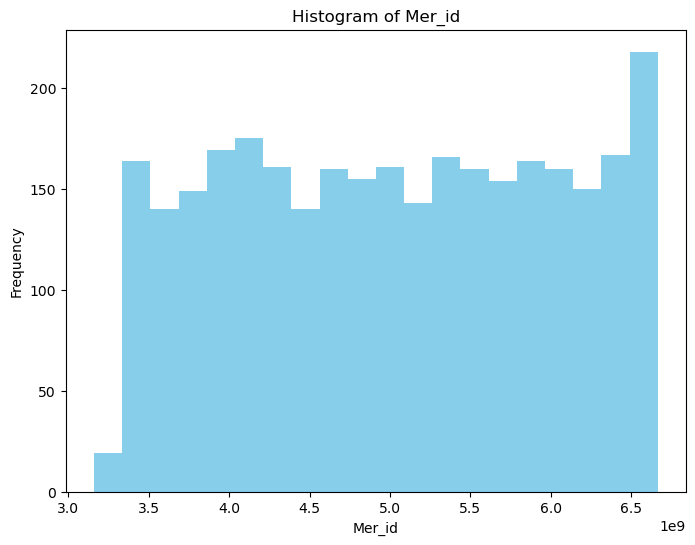

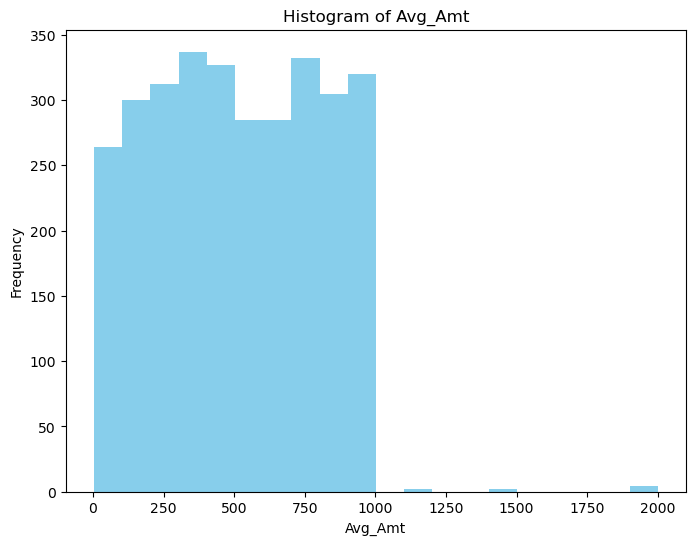

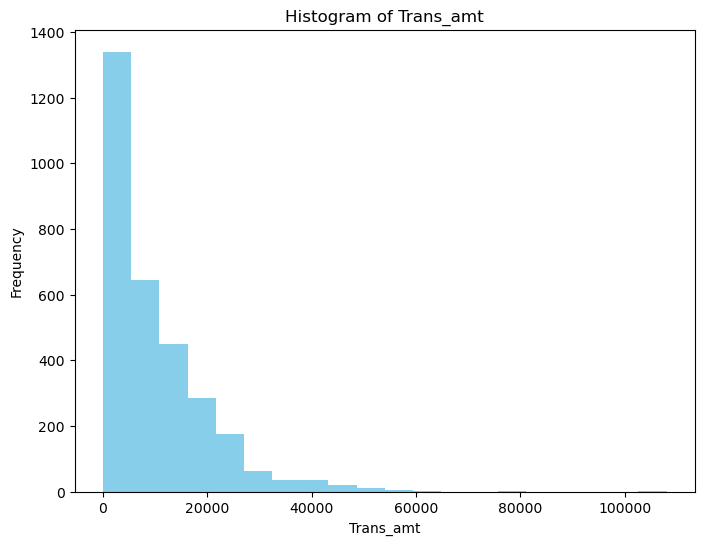

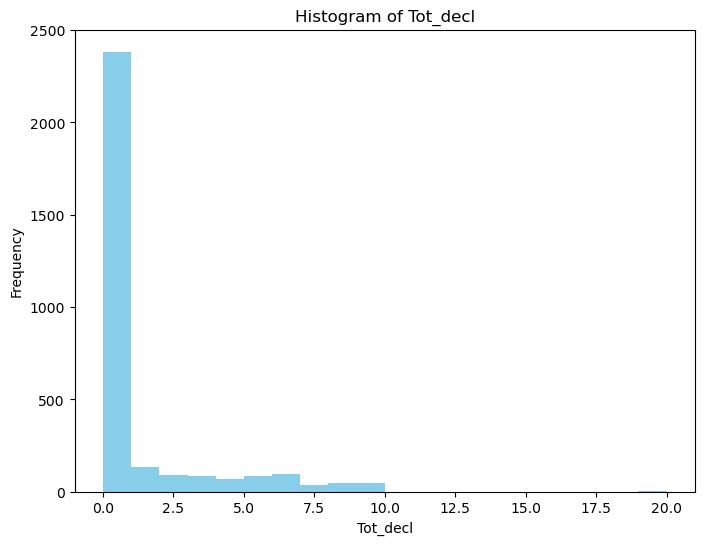

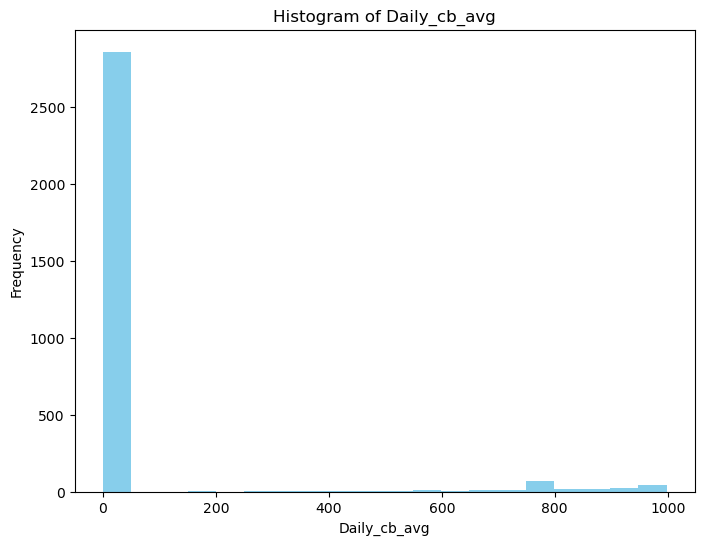

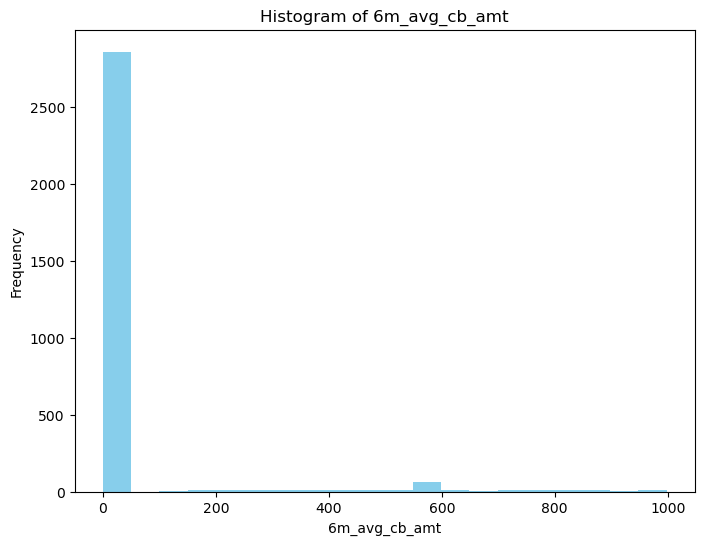

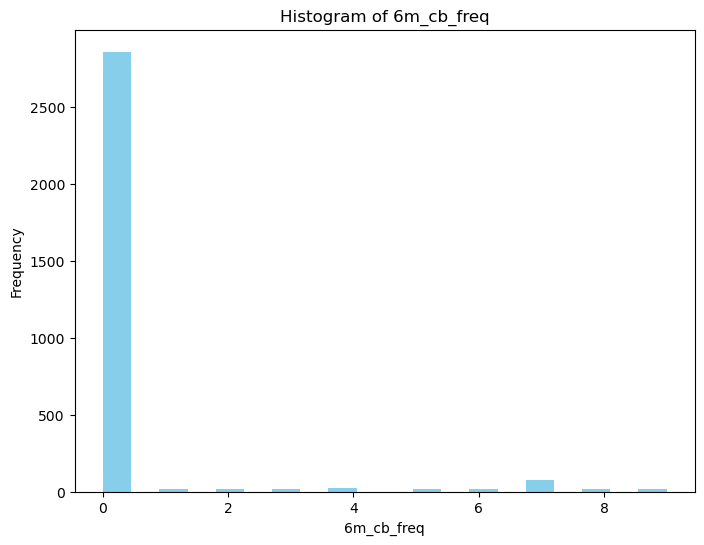

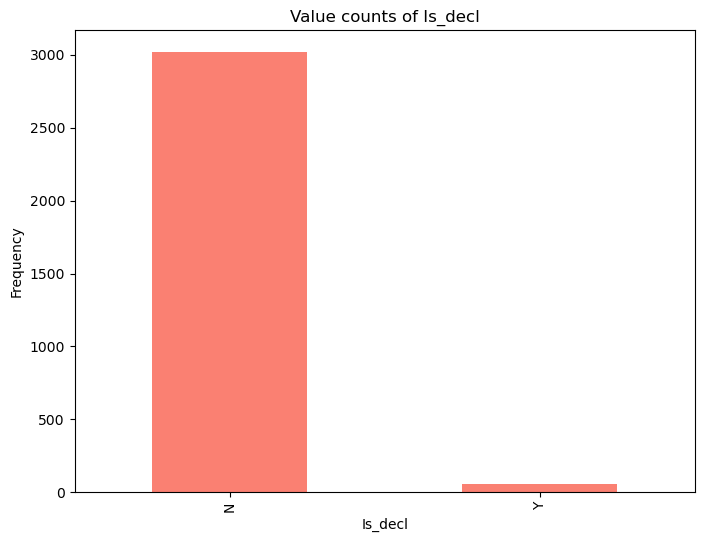

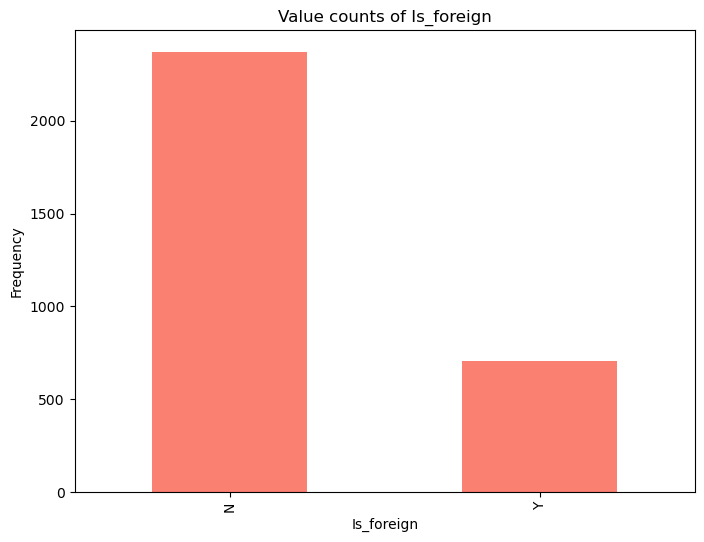

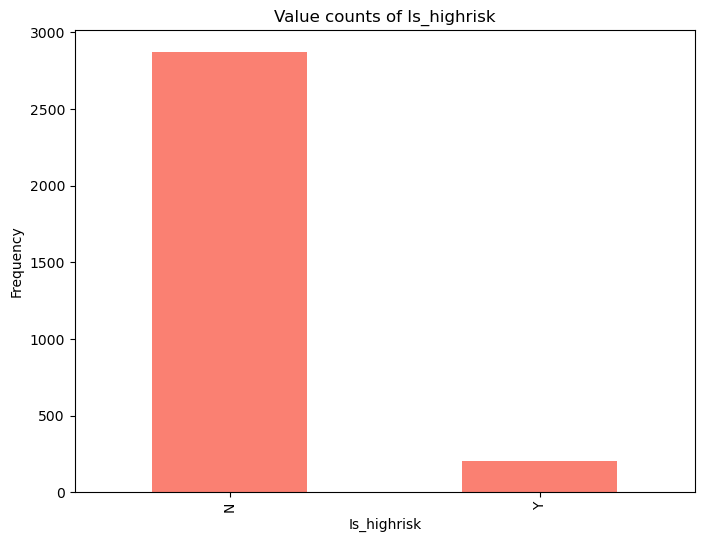

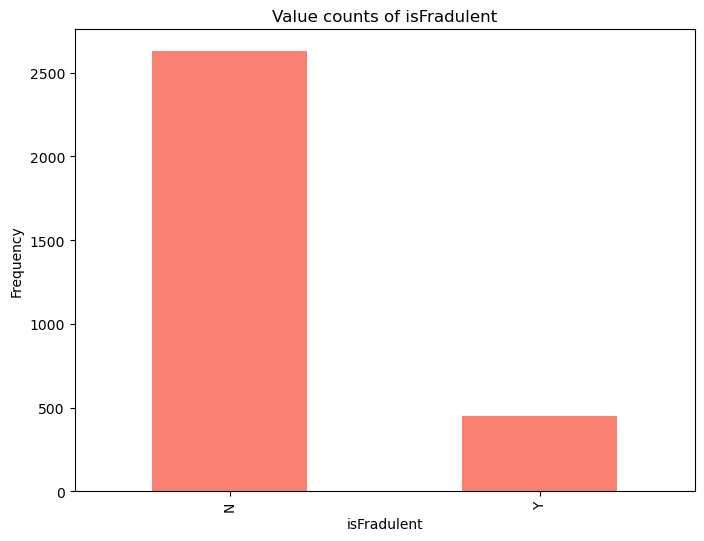

In [45]:
import matplotlib.pyplot as plt

# describe dataset
numerical_stats = df.describe()
print("Basic statistics for numerical columns:")
print(numerical_stats)

# Histograms 
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# bar plots for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar', color='salmon')
    plt.title(f'Value counts of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


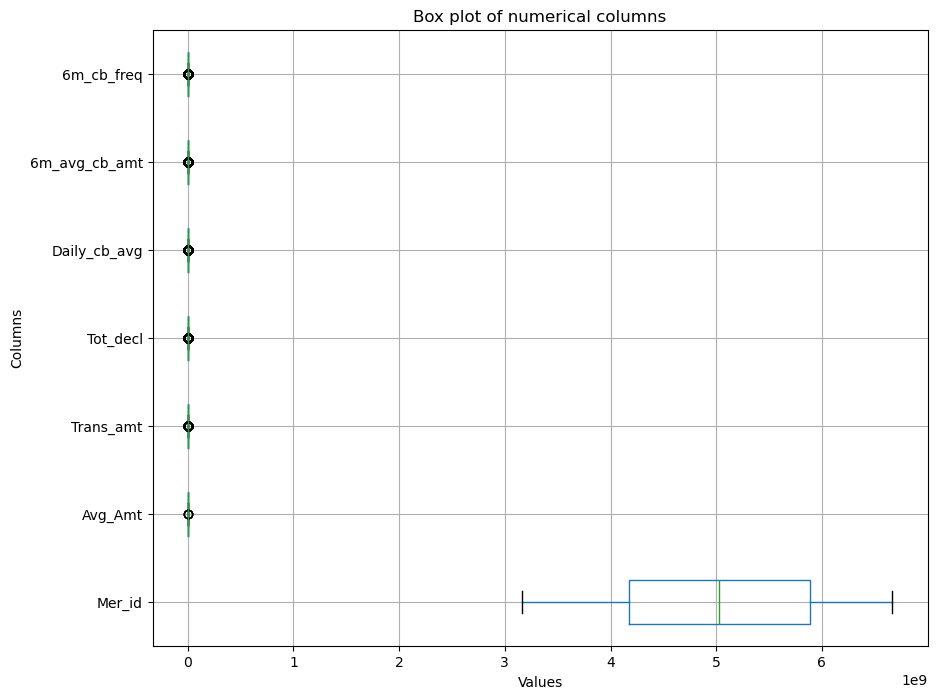

In [46]:
# Box plots
plt.figure(figsize=(10, 8))
df[numerical_columns].boxplot(vert=False)
plt.title('Box plot of numerical columns')
plt.xlabel('Values')
plt.ylabel('Columns')
plt.show()


In [47]:
# IQR 
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Check outliers
potential_outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Show outliers
print("outliers:")
print(df[potential_outliers])

outliers:
          Mer_id  Avg_Amt  Trans_amt Is_decl  Tot_decl Is_foreign Is_highrisk  \
0     3160040998    100.0     3000.0       N         5          Y           Y   
1     3160040998    100.0     4300.0       N         5          Y           Y   
2     3160041896    185.5     4823.0       Y         5          N           N   
3     3160141996    185.5     5008.5       Y         8          N           N   
4     3160241992    500.0    26000.0       N         0          Y           Y   
...          ...      ...        ...     ...       ...        ...         ...   
3070  6661273532    500.0    11000.0       Y         0          N           N   
3071  6661273532    800.0        0.0       Y         0          N           N   
3072  6661273533    800.0    20800.0       Y         0          N           N   
3073  6661273532   1500.0    12000.0       Y         0          Y           Y   
3074  6661273533   1500.0    36000.0       Y         0          Y           Y   

      Daily_cb_av

In [49]:
# Calculate
Q1 = df['Trans_amt'].quantile(0.25)
Q3 = df['Trans_amt'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Put lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame
df_filtered = df[(df['Trans_amt'] >= lower_bound) & (df['Trans_amt'] <= upper_bound)]

print(df_filtered)


          Mer_id  Avg_Amt  Trans_amt Is_decl  Tot_decl Is_foreign Is_highrisk  \
0     3160040998    100.0     3000.0       N         5          Y           Y   
1     3160040998    100.0     4300.0       N         5          Y           Y   
2     3160041896    185.5     4823.0       Y         5          N           N   
3     3160141996    185.5     5008.5       Y         8          N           N   
4     3160241992    500.0    26000.0       N         0          Y           Y   
...          ...      ...        ...     ...       ...        ...         ...   
3069  6661273529   1000.0    25000.0       Y         0          Y           N   
3070  6661273532    500.0    11000.0       Y         0          N           N   
3071  6661273532    800.0        0.0       Y         0          N           N   
3072  6661273533    800.0    20800.0       Y         0          N           N   
3073  6661273532   1500.0    12000.0       Y         0          Y           Y   

      Daily_cb_avg  6m_avg_

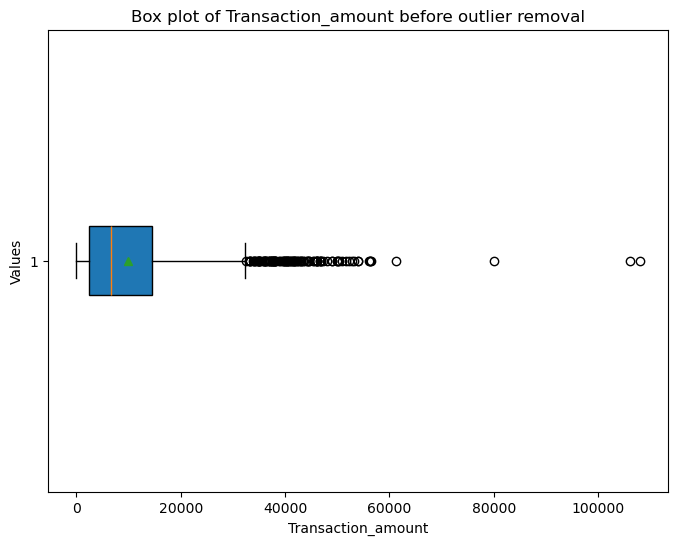

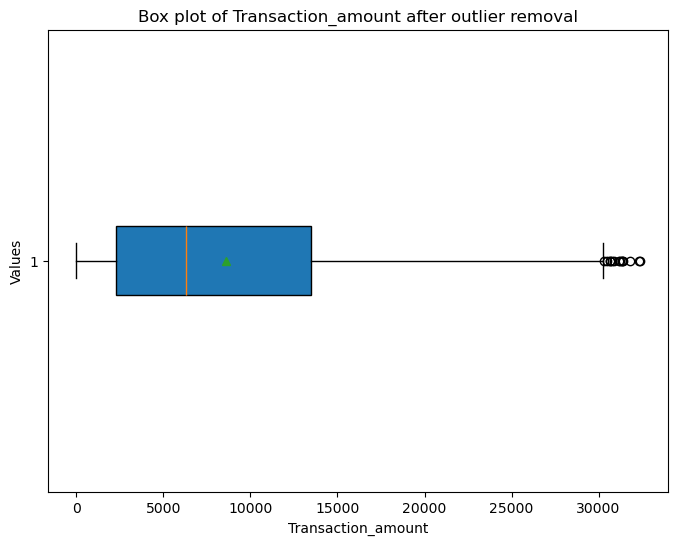

In [50]:
# Box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Trans_amt'], vert=False, patch_artist=True, showmeans=True)
plt.title('Box plot of Transaction_amount before outlier removal')
plt.xlabel('Transaction_amount')
plt.ylabel('Values')
plt.show()

# Box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df_filtered['Trans_amt'], vert=False, patch_artist=True, showmeans=True)
plt.title('Box plot of Transaction_amount after outlier removal')
plt.xlabel('Transaction_amount')
plt.ylabel('Values')
plt.show()


In [52]:
# One hot encoding
df_encoded = pd.get_dummies(df)

print(df_encoded.head())


       Mer_id  Avg_Amt  Trans_amt  Tot_decl  Daily_cb_avg  6m_avg_cb_amt  \
0  3160040998    100.0     3000.0         5             0            0.0   
1  3160040998    100.0     4300.0         5             0            0.0   
2  3160041896    185.5     4823.0         5             0            0.0   
3  3160141996    185.5     5008.5         8             0            0.0   
4  3160241992    500.0    26000.0         0           800          677.2   

   6m_cb_freq  Is_decl_N  Is_decl_Y  Is_foreign_N  Is_foreign_Y  \
0           0       True      False         False          True   
1           0       True      False         False          True   
2           0      False       True          True         False   
3           0      False       True          True         False   
4           6       True      False         False          True   

   Is_highrisk_N  Is_highrisk_Y  isFradulent_N  isFradulent_Y  
0          False           True          False           True  
1          F

In [53]:
# remove columns
columns_to_remove = ['Is_decl_N', 'Is_foreign_N', 'Is_highrisk_N', 'isFradulent_N']

df_encoded_cleaned = df_encoded.drop(columns=columns_to_remove)

print(df_encoded_cleaned.head())


       Mer_id  Avg_Amt  Trans_amt  Tot_decl  Daily_cb_avg  6m_avg_cb_amt  \
0  3160040998    100.0     3000.0         5             0            0.0   
1  3160040998    100.0     4300.0         5             0            0.0   
2  3160041896    185.5     4823.0         5             0            0.0   
3  3160141996    185.5     5008.5         8             0            0.0   
4  3160241992    500.0    26000.0         0           800          677.2   

   6m_cb_freq  Is_decl_Y  Is_foreign_Y  Is_highrisk_Y  isFradulent_Y  
0           0      False          True           True           True  
1           0      False          True           True           True  
2           0       True         False          False           True  
3           0       True         False          False           True  
4           6      False          True           True           True  


In [54]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# LabelEncoder
label_encoder = LabelEncoder()

# categorical to numerical data
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# MinMaxScaler 
scaler = MinMaxScaler()

# normalization 
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df.head())


         Mer_id   Avg_Amt  Trans_amt  Is_decl  Tot_decl  Is_foreign  \
0  0.000000e+00  0.048091   0.027778        0      0.25           1   
1  0.000000e+00  0.048091   0.039815        0      0.25           1   
2  2.561422e-07  0.090927   0.044657        1      0.25           0   
3  2.880830e-05  0.090927   0.046375        1      0.40           0   
4  5.733079e-05  0.248493   0.240741        0      0.00           1   

   Is_highrisk  Daily_cb_avg  6m_avg_cb_amt  6m_cb_freq  isFradulent  
0            1      0.000000       0.000000    0.000000            1  
1            1      0.000000       0.000000    0.000000            1  
2            0      0.000000       0.000000    0.000000            1  
3            0      0.000000       0.000000    0.000000            1  
4            1      0.801603       0.678557    0.666667            1  


In [55]:
from sklearn.model_selection import train_test_split

# Split the dataset 
X = df.drop(columns=['isFradulent'])  
y = df['isFradulent']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# shapes of the training and testing sets
print("Shape of training set X_train", X_train.shape)
print("Shape of testing set X_test", X_test.shape)
print("Shape of training set y_train", y_train.shape)
print("Shape of testing set y_test", y_test.shape)


Shape of training set X_train (2152, 10)
Shape of testing set X_test (923, 10)
Shape of training set y_train (2152,)
Shape of testing set y_test (923,)


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# put Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train data
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy", accuracy)

# classification report
print("Classification Report")
print(classification_report(y_test, y_pred))


Accuracy 0.9761646803900325
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       773
           1       0.96      0.89      0.92       150

    accuracy                           0.98       923
   macro avg       0.97      0.94      0.95       923
weighted avg       0.98      0.98      0.98       923



In [18]:
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns

# Check accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1 Score:", f1)



Accuracy: 0.9761646803900325
F1 Score: 0.9241379310344827


In [58]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

#  XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train data
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy  ", accuracy)
print("F1 Score ", f1)

Accuracy   0.980498374864572
F1 Score  0.9395973154362416


In [59]:

print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       773
           1       0.95      0.93      0.94       150

    accuracy                           0.98       923
   macro avg       0.97      0.96      0.96       923
weighted avg       0.98      0.98      0.98       923

